# 0.0 IMPORTS

In [1]:
import matplotlib
import datetime
import pandas           as pd
import seaborn          as sns
import numpy            as np
import matplotlib.pyplot as plt
import plotly_express as px

## 0.1 Loading data

In [2]:
df = pd.read_csv('books.csv')

# 1.0 DATA DESCRIPTION

## 1.1 Data Dimensions

In [3]:
print(f'Lines: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Lines: 11123
Columns: 12


## 1.2 Data Types

In [4]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [5]:
df['publication_year'] = pd.to_numeric(df['publication_date'].str.slice(-4))
df = df.drop(columns='publication_date')

In [6]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publisher              object
publication_year        int64
dtype: object

## 1.3 Check NA

In [7]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publisher             0
publication_year      0
dtype: int64

## 1.4 Descriptive Statistical

In [8]:
num_att = df.select_dtypes(include=['float64','int64'])
cat_att = df.select_dtypes(exclude=['float64','int64'])

In [9]:
num_att.sample(2)


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_year
9213,5297,4.08,9.780000e+12,272,760717,17179,2004
3046,18265,3.71,9.780000e+12,807,51,11,1994


In [10]:
cat_att.sample(2)

,title,authors,isbn,language_code,publisher
6259,Runaways (Orphans #5),V.C. Andrews,671007637,eng,Pocket Books
6464,Seven Sunny Days,Chris Manby,373895208,eng,Red Dress Ink


In [11]:
authors = len(df['authors'].unique())
unique_books = len(df['title'].unique())

print(f'This dataset has a total of {unique_books} unique titles and {authors} authors')


This dataset has a total of 10348 unique titles and 6632 authors


### 1.4.1 Numerical Attributes

In [12]:
# Central Tendency - mean, medians
ct1 = pd.DataFrame( num_att.apply(np.mean ) ).T
ct2 = pd.DataFrame( num_att.apply(np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_att.apply( np.std )).T
d2 = pd.DataFrame( num_att.apply( min )).T
d3 = pd.DataFrame( num_att.apply( max )).T
d4 = pd.DataFrame( num_att.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame( num_att.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame( num_att.apply( lambda x: x.kurtosis() )).T

num_att_describe = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
num_att_describe.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew','kurtosis']
num_att_describe


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,bookID,1.000000e+00,4.564100e+04,4.564000e+04,2.131086e+04,2.028700e+04,1.309414e+04,0.144010,-1.146588
1,average_rating,0.000000e+00,5.000000e+00,5.000000e+00,3.934075e+00,3.960000e+00,3.504696e-01,-3.577441,36.222806
2,isbn13,8.987060e+09,9.790000e+12,9.781013e+12,9.759170e+12,9.780000e+12,4.429246e+11,-21.066438,442.472546
3,num_pages,0.000000e+00,6.576000e+03,6.576000e+03,3.364056e+02,2.990000e+02,2.411418e+02,4.271778,62.415973
4,ratings_count,0.000000e+00,4.597666e+06,4.597666e+06,1.794285e+04,7.450000e+02,1.124941e+05,17.693952,442.271674
5,text_reviews_count,0.000000e+00,9.426500e+04,9.426500e+04,5.420481e+02,4.700000e+01,2.576504e+03,16.175096,396.565060
6,publication_year,1.900000e+03,2.020000e+03,1.200000e+02,2.000169e+03,2.003000e+03,8.246856e+00,-2.992627,16.259456


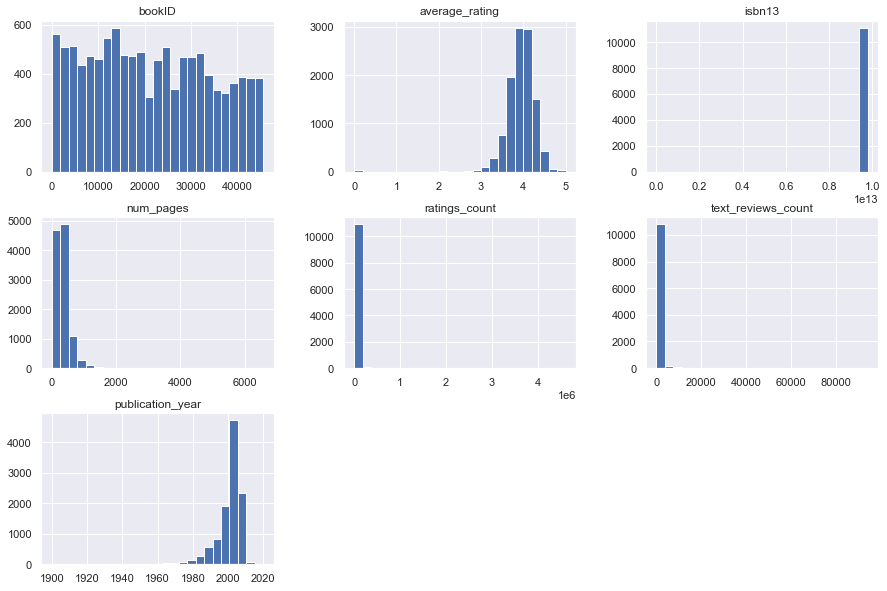

In [13]:
sns.set(rc={'figure.figsize':(15,10)})
num_att.hist( bins = 25)
plt.show()

### 1.4.1 Categorical Attributes

In [14]:
cat_att.apply(lambda x: x.unique().shape[0])

title            10348
authors           6632
isbn             11123
language_code       27
publisher         2290
dtype: int64

# 2.0 Hypothesis

**1.** Most books are from US

In [43]:
fig = px.histogram(df, x='language_code')
fig.show()

In [45]:
fig = px.histogram(df, x='num_pages')
fig.show()

# 3.0 to be reorganized 

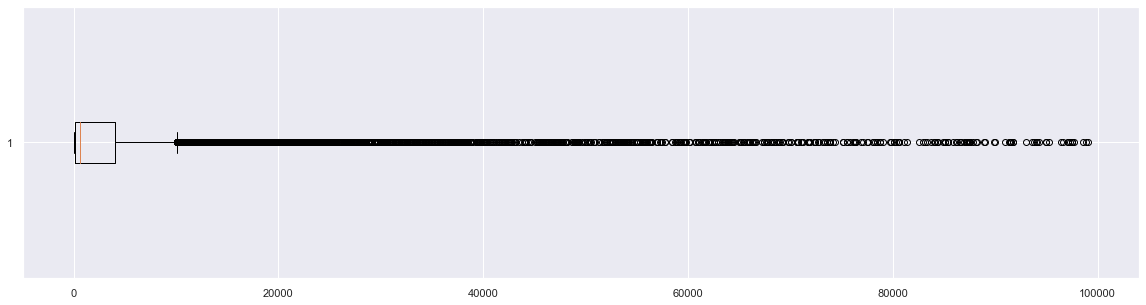

In [17]:
# There are a few outliers in the dataset so we need to find a reasonable number to make the plot understandable
df1 = df.loc[df['ratings_count'] < 100000]
plt.figure(figsize=(20,5))
plt.boxplot(df1['ratings_count'], vert=False)
plt.show()

## Outliers Removal with IQR (did not work properly)

In [18]:
Q1 = df['ratings_count'].quantile(0.25)
Q3 = df['ratings_count'].quantile(0.75)
IQR = Q3 - Q1
print(f'Q1 {Q1} - Q3 {Q3} - IQR {IQR}')

Q1 104.0 - Q3 5000.5 - IQR 4896.5


In [19]:
lower_limit = Q1 - (IQR * 1.5)
upper_limit = Q3 + (IQR * 1.5)
lower_limit, upper_limit

(-7240.75, 12345.25)

In [20]:
outlier_iqr = df.loc[(df['ratings_count'] < lower_limit)|(df['ratings_count'] > upper_limit)]
outlier_iqr

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year
1,1067,1776,David McCullough,4.07,743226720,9.780000e+12,eng,386,166916,6243,Simon Schuster,2006
8,11525,1 000 Places to See Before You Die,Patricia Schultz,3.85,761104844,9.780000e+12,eng,992,36303,439,Workman Publishing Company,2003
11,11339,100 Love Sonnets,Pablo Neruda/Stephen Tapscott,4.39,292760280,9.780000e+12,eng,232,12613,392,University of Texas Press,1986
18,17020,13 Little Blue Envelopes (Little Blue Envelope...,Maureen Johnson,3.64,60541431,9.780000e+12,eng,322,70689,4067,HarperCollins Publishers,2010
21,39020,1491: New Revelations of the Americas Before C...,Charles C. Mann,4.02,1400032059,9.780000e+12,eng,541,56290,3238,Vintage,2006
...,...,...,...,...,...,...,...,...,...,...,...,...
11076,33453,You Suck (A Love Story #2),Christopher Moore,3.83,60590297,9.780000e+12,eng,328,42028,2416,William Morrow,2007
11095,22193,You're the One That I Want (Gossip Girl #6),Cecily von Ziegesar,3.71,316735167,9.780000e+12,eng,224,17875,204,Little Brown Young Readers,2004
11101,13134,You've Been Warned,James Patterson/Howard Roughan,3.53,316014508,9.780000e+12,eng,374,18058,1519,Little Brown and Company,2007
11108,629,Zen and the Art of Motorcycle Maintenance: An ...,Robert M. Pirsig,3.77,60589469,9.780000e+12,eng,540,166046,6446,HarperTorch,2006


In [21]:
df_no_outlier = df.loc[(df['ratings_count'] > lower_limit ) & (df['ratings_count'] < upper_limit)].sort_values(by='ratings_count', ascending=False)
df_no_outlier

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year
7269,23887,The Autumn of the Patriarch,Gabriel García Márquez/Gregory Rabassa,3.85,60882867,9.780000e+12,eng,255,12336,492,Harper Perennial Modern Classics,2006
1078,19631,Birds of America,Lorrie Moore,4.11,312241224,9.780000e+12,eng,291,12321,951,Picador USA,1999
9723,11686,The Stories of John Cheever,John Cheever/Pelle Fritz-Crone,4.27,375724427,9.780000e+12,eng,693,12270,529,Vintage International,2000
3558,20252,House Corrino (Prelude to Dune #3),Brian Herbert/Kevin J. Anderson,3.68,553580337,9.780000e+12,eng,667,12257,167,Spectra Books,2002
1987,16329,Dead Man's Folly (Hercule Poirot #33),Agatha Christie/David Suchet,3.79,1572705477,9.780000e+12,eng,6,12256,393,BBC Audiobooks,2006
...,...,...,...,...,...,...,...,...,...,...,...,...
11005,41117,Worlds of Wonder,Terry Pastor/Damon Knight/Philip K. Dick/C.M. ...,4.13,575043555,9.780000e+12,eng,368,0,0,Orion Publishing Co,1988
3726,25903,I'll Be Home Before Midnight and I Won't Get P...,Anthony E. Wolf,0.00,394755669,9.780000e+12,eng,288,0,0,Knopf Doubleday Publishing Group,1988
4982,35760,Mistaken Identity,Nayantara Sahgal,2.98,8172235224,9.790000e+12,eng,324,0,0,Harper Collins,2016
5572,34320,Operation Spy School (Adam Sharp #4),George E. Stanley/Guy Francis,3.80,375824049,9.780000e+12,eng,44,0,0,Random House Books for Young Readers,2003


### Did not work well because the lower limit (-7317.25) does not exist  as minimum vote count is 0 and upper limit is too short, leading us to cut out a lot of relevante data

## Outliers Removal with Z-Score (did not work properly)

In [22]:
outlier_z = []
mean = np.mean(df['ratings_count'])
std = np.std(df['ratings_count'])
mean, std
treshold = 3

for i in df['ratings_count']:
    z_score = (i - mean) / std
    if np.abs(z_score) > treshold:
        outlier_z.append(i)

       
df_z = df.loc[~df['ratings_count'].isin(outlier_z)]
df_z

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year
0,16967,1632,Eric Flint,4.04,1416532811,9.780000e+12,eng,597,8406,638,Baen Books,2006
1,1067,1776,David McCullough,4.07,743226720,9.780000e+12,eng,386,166916,6243,Simon Schuster,2006
2,1068,1776,Peter Stone/Sherman Edwards,4.22,140481397,9.780000e+12,eng,192,1299,30,Penguin Books,1976
3,5477,1984,George Orwell/Erich Fromm,4.18,451516753,9.780000e+12,eng,268,1322,121,Signet Classics,1981
4,19100,1984,George Orwell/Mauricio Molina/Miguel Martínez ...,4.18,9685270880,9.790000e+12,spa,301,451,42,Lectorum,2002
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.00,744002354,9.780000e+12,eng,128,2,0,BradyGames,2003
11119,38069,Zora Neale Hurston: A Literary Biography,Robert E. Hemenway/Alice Walker,4.10,252008073,9.780000e+12,eng,408,103,9,University of Illinois Press,1980
11120,38070,Zora Neale Hurston: Critical Perspectives Past...,Henry Louis Gates Jr./Kwame Anthony Appiah,4.20,1567430287,9.780000e+12,eng,238,24,0,Harper Paperbacks,2000
11121,24796,Zorro,Isabel Allende/Margaret Sayers Peden/محمدعلی م...,3.76,006078721X,9.780000e+12,eng,677,16324,1145,HarperLargePrint,2005


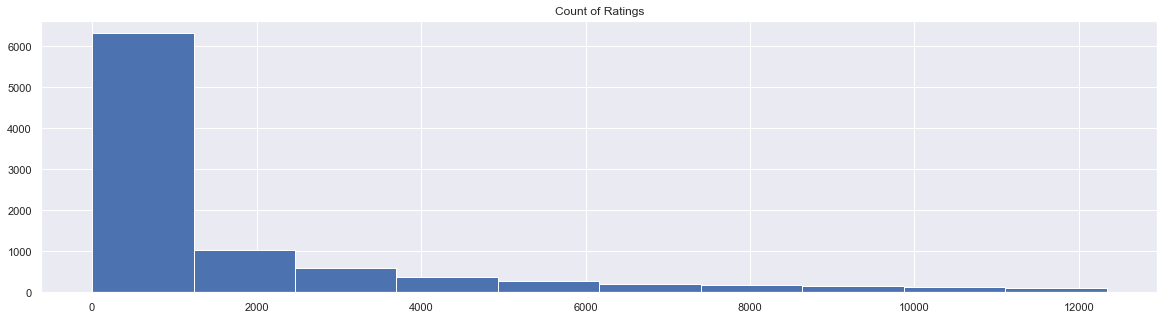

In [23]:
# Graphic without IRQ outliers
plt.figure(figsize=(20,5))
plt.hist(df_no_outlier['ratings_count'])
plt.title('Count of Ratings')
plt.show()

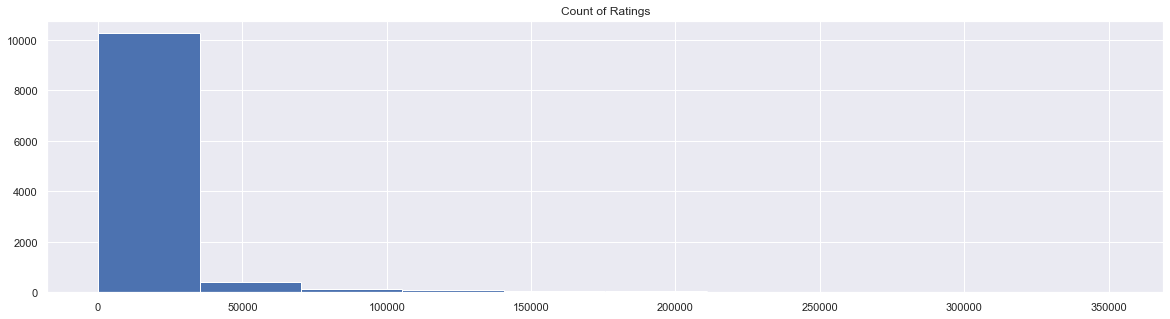

In [24]:
# Graphic without Z_Score outliers
plt.figure(figsize=(20,5))
plt.hist(df_z['ratings_count'])
plt.title('Count of Ratings')
plt.show()

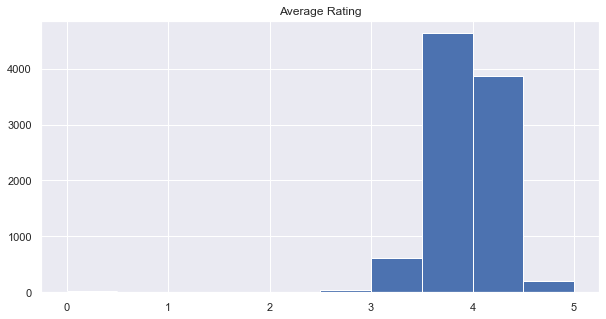

In [25]:
plt.figure(figsize=(10,5))
plt.hist(df_no_outlier['average_rating'])
plt.title('Average Rating')
plt.show()

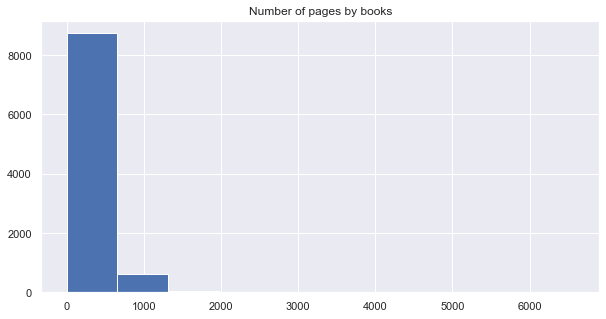

In [26]:
plt.figure(figsize=(10,5))
plt.hist(df_no_outlier['num_pages'])
plt.title('Number of pages by books')
plt.show()

# Playing with Data to see what we can find out from this dataset

## TOP 10 Books with best average

In [27]:
# Top 10 Books with best average rating
best_average = df.sort_values(by='average_rating',ascending=False)
best_average.head(5)




,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year
1711,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,198145047,9.780000e+12,grc,364,0,0,Oxford University Press USA,1922
1067,41639,Bill Gates: Computer Legend (Famous Lives),Sara Barton-Wood,5.0,739844326,9.780000e+12,eng,48,0,0,Raintree,2001
7775,18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,851621813,9.780000e+12,eng,96,1,0,Boosey & Hawkes Inc,2004
2707,32823,Fanning the Flame: Bible Cross and Mission,Chris Green/Chris Wright/Paul Douglas Gardner,5.0,310249872,9.780000e+12,eng,336,1,1,Zondervan,2003
9047,23552,The New Big Book of America,Todd Davis/Marc Frey,5.0,762412631,9.780000e+12,eng,56,2,1,Courage Books,2002


### We have a "problem" here. Books with a small number of votes will definetely have a higher change of having best averages. It's up to you to decide what is the minimum quantity of notes that will make you believe that a book is trully real

In [28]:
# Top 10 Books with best average rating (according to yours criteria)
def best_books_4real(ratings_count):

    best_average2 = df.loc[df['ratings_count'] > ratings_count].sort_values(by='ratings_count',ascending=False)
    return best_average2.head(5)

In [29]:
best_books_4real(ratings_count = 20)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year
10468,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9.780000e+12,eng,501,4597666,94265,Little Brown and Company,2006
8450,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,618260307,9.780000e+12,eng,366,2530894,32871,Houghton Mifflin,2002
7578,5107,The Catcher in the Rye,J.D. Salinger,3.80,316769177,9.780000e+12,eng,277,2457092,43499,Back Bay Books,2001
684,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9.780000e+12,eng,736,2418736,21303,Pocket Books,2006
3339,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9.780000e+12,eng,435,2339585,36325,Scholastic Inc.,2004


### Seems like now we have a better result by removing the books voted just by the authors family

In [30]:
# Top 10 Most voted books
most_reviewed = df.sort_values(by='ratings_count',ascending=False)
most_reviewed.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year
10468,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9.780000e+12,eng,501,4597666,94265,Little Brown and Company,2006
8450,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,618260307,9.780000e+12,eng,366,2530894,32871,Houghton Mifflin,2002
7578,5107,The Catcher in the Rye,J.D. Salinger,3.80,316769177,9.780000e+12,eng,277,2457092,43499,Back Bay Books,2001
684,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9.780000e+12,eng,736,2418736,21303,Pocket Books,2006
3339,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9.780000e+12,eng,435,2339585,36325,Scholastic Inc.,2004


## Author with most books and best average

In [31]:
# Autor with best average

# Grouping by authors name to find the average
authors_avg = df.groupby(by='authors', sort=False)['average_rating'].mean().reset_index()
authors_avg.sort_values(by='average_rating',ascending=False)

# Grouping by authors name to find the number of books written
authors_count = df.groupby(by='authors')['average_rating'].count().reset_index()
authors_count.sort_values(by='average_rating', ascending=False)

# Converting Series to DataFrame
authors_count = authors_count.merge(authors_avg, on = 'authors' )
authors_count

,authors,average_rating_x,average_rating_y
0,A.B. Yehoshua/Hillel Halkin,2,3.600
1,A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,1,3.760
2,A.E. Cunningham/Harlan Ellison/Charles F. Mill...,1,4.150
3,A.J. Jacobs,1,3.760
4,A.M. Homes,1,3.280
...,...,...,...
6627,Émile Zola/Henri Mitterand,1,4.060
6628,Émile Zola/Robert Lethbridge/Elinor Dorday,1,4.010
6629,Émile Zola/Robin Buss/Brian Nelson,1,3.990
6630,Émile Zola/Roger Pearson,2,4.045


In [32]:
authors_count = authors_count.rename(columns={'average_rating_x':'count', 'average_rating_y':'mean'})
authors_count.sort_values(by='count',ascending=False,inplace=True)
authors_most_books = authors_count.head(10)
authors_most_books

,authors,count,mean
5779,Stephen King,40,3.973500
4740,P.G. Wodehouse,40,4.147250
5463,Rumiko Takahashi,39,4.186667
4704,Orson Scott Card,35,3.779143
46,Agatha Christie,33,3.989091
4980,Piers Anthony,30,3.716667
5521,Sandra Brown,29,3.742069
4298,Mercedes Lackey,29,4.039310
1401,Dick Francis,28,3.962143
2622,J.K. Rowling,24,4.521250


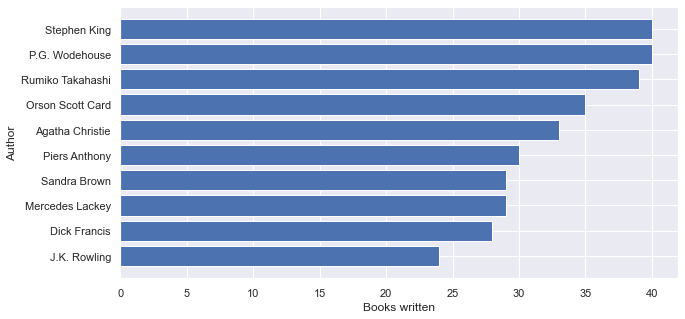

In [33]:
plt.figure(figsize=(10,5))
plt.barh(authors_most_books['authors'], authors_most_books['count'])
plt.ylabel('Author')
plt.xlabel('Books written')
plt.gca().invert_yaxis()

In [34]:
def authors_avg(quantity_of_books):
    authors_best_avg = authors_count[authors_count['count'] > quantity_of_books].sort_values(by='mean', ascending=False)
    authors_best_avg.head(20)
    return authors_best_avg

In [35]:
# Change the number to filter authors based on quantity of books published
authors_avg(30)

,authors,count,mean
5463,Rumiko Takahashi,39,4.186667
4740,P.G. Wodehouse,40,4.147250
46,Agatha Christie,33,3.989091
5779,Stephen King,40,3.973500
4704,Orson Scott Card,35,3.779143


## Checking if there is any correlation between columns

<AxesSubplot:>

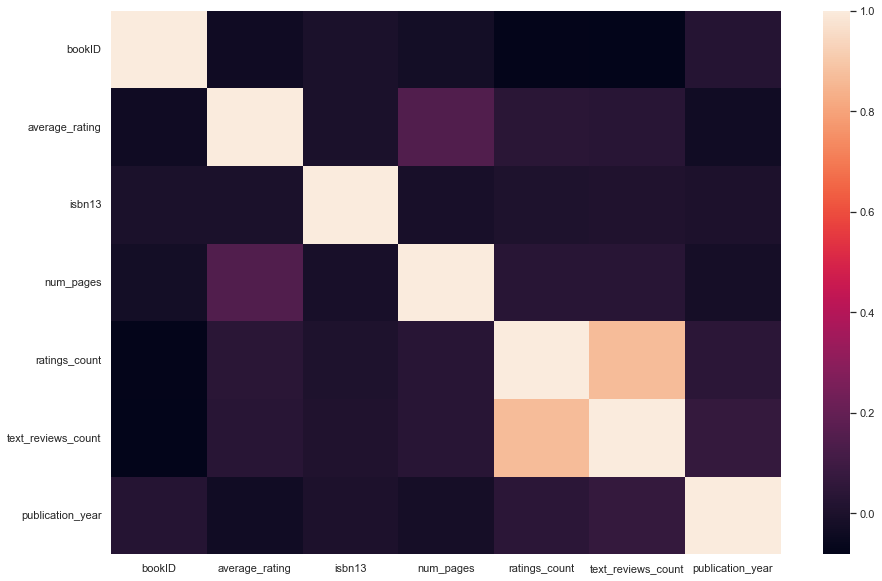

In [36]:
sns.heatmap(df.corr())

## Books with more ratings receive more reviews?

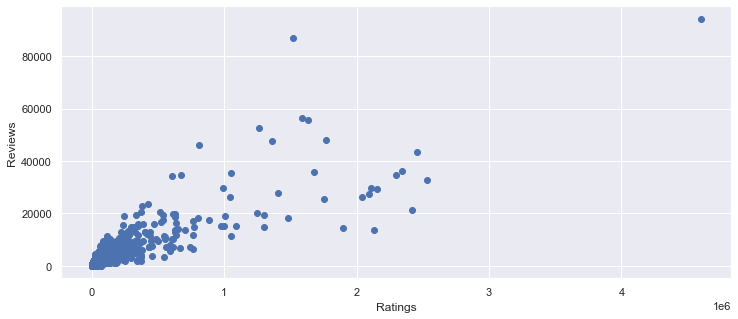

In [37]:
plt.figure(figsize=(12,5))
plt.scatter(x = df['ratings_count'],y= df['text_reviews_count'])
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.show()

### Seems like a positive correlation

## Shorter books receive more votes?

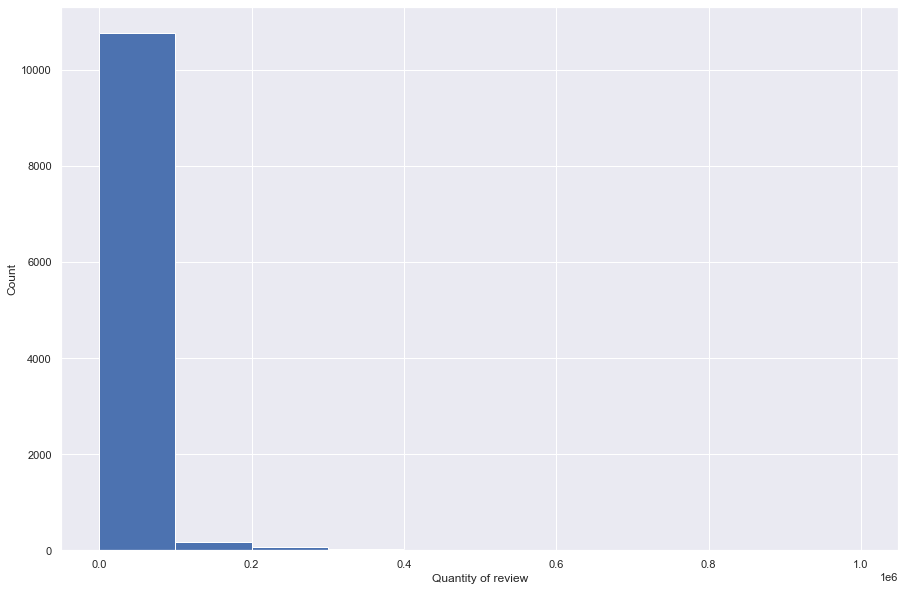

In [38]:
df_3= df.loc[df['ratings_count'] < 1000000]
plt.figure()
plt.hist(x = df_3['ratings_count'])
plt.xlabel('Quantity of review')
plt.ylabel('Count')
plt.show()

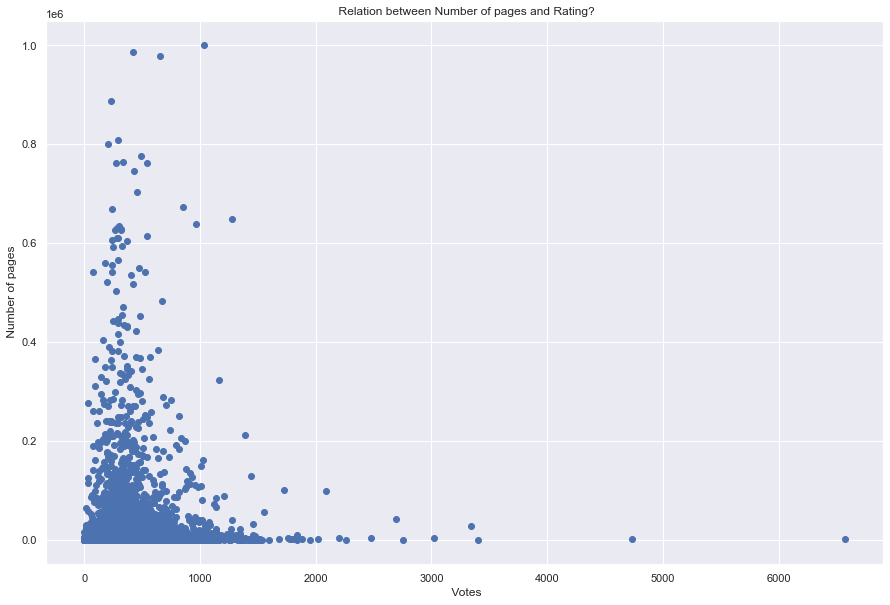

In [39]:
plt.figure()
plt.scatter(x =df_3['num_pages'] , y = df_3['ratings_count'])
plt.title(' Relation between Number of pages and Rating?')
plt.xlabel(' Votes')
plt.ylabel(' Number of pages')
plt.show()

### According to graphic we can say that books with more pages are less likely to receive a rating on website.

In [40]:
# Best book of each year
# Author with most books publicized